<a href="https://colab.research.google.com/github/Berlinzm/Talento-TECH/blob/main/Proyecto_final_calidad_agua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Miniproyecto:** Predicción Simple de Calidad del Agua para Mejorar el Uso y Consumo en Comunidades Rurales.
**Objetivo general:** Con datos básicos como pH, turbidez, dureza, etc., **predecir** si el agua es potable o no.

**Objetivos específicos:**Alertar sobre riesgos potenciales;
facilitar medidas preventivas y
mejorar la gestión del recurso hídrico con datos accesibles.

# **Importación de Librerías**
Importamos las herramientas necesarias para manejo de datos, visualización y modelos de Machine Learning.

In [ ]:
# Manejo de datos y visualización
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Modelos de regresión
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Clustering y escalado
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# División de datos
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


Este código importa librerías necesarias para trabajar con información y entenderla mejor. Esas herramientas permiten organizar datos, dibujar gráficos para ver qué pasa, y usar métodos para predecir cosas o agrupar información similar.

## **2. Carga y Exploración de Datos**
Cargamos el archivo Excel con los datos.

Revisamos tamaño, columnas, primeras filas y estadísticas básicas.

In [ ]:
df_agua = pd.read_excel("agua_potable.xlsx")
print(df_agua.shape)


(3276, 10)


In [ ]:
#son 3277 registros con 10 columnas. Veamos los primeros registros para tener una idea
df_agua.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.100245e+12,16060823048420900,13886809713477400,7.542775e+15,3.666888e+14,44994828652782496,18722859886617400,6.439052e+15,2.174898e+15,1
1,7.025504e+12,20540052911647300,218845385145885,7.276065e+15,3.047322e+15,4424055401716910,15843743650390500,6.558034e+15,2.941555e+16,0
2,8.942046e+12,2156737860705190,5648867241273910,3.231438e+16,1.290000e+16,5419154676754550,9313770679686220,7.082837e+15,4.354288e+15,1
3,2.925174e+13,26045804113718800,3923309883885380,7.670149e+16,3.034021e+16,4032437351708760,11309210335190500,6.923844e+15,3.678588e+16,0
4,3.878879e+13,17771284092836600,2193747156902810,7.369769e+15,2.992416e+15,44730375575365904,12451911879217200,6.316311e+15,4.927711e+15,0


In [ ]:
df_agua.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_standardized,Turbidity_standardized
count,2.785000e+03,2.785000e+03,2.785000e+03,2.785000e+03,2.116000e+03,2.785000e+03,2.785000e+03,2.649000e+03,2.785000e+03,2785.000000,2785.000000,2.785000e+03
mean,1.149380e+16,1.433238e+16,1.380039e+16,1.129543e+16,1.602689e+16,1.736702e+16,1.128494e+16,1.161549e+16,1.483779e+16,0.395332,0.000000,1.275660e-17
std,1.678816e+16,8.506884e+15,1.086238e+16,1.622758e+16,1.512730e+16,1.797070e+16,7.156882e+15,1.537023e+16,1.561818e+16,0.489010,1.000180,1.000180e+00
min,0.000000e+00,4.743200e+04,1.841913e+13,5.303513e-01,2.670261e+12,4.143282e+12,2.048390e+12,7.380000e-01,1.450000e+00,0.000000,-0.684760,-9.502041e-01
25%,5.711213e+15,2.296032e+15,2.850822e+15,5.809436e+15,3.231468e+15,3.957133e+15,7.507662e+15,5.458074e+15,3.933565e+15,0.000000,-0.344506,-6.983008e-01
50%,7.009602e+15,1.796364e+16,1.372091e+16,7.121264e+15,3.788872e+15,5.150600e+15,1.273604e+16,6.898197e+15,4.682391e+15,0.000000,-0.267153,-6.503464e-01
75%,8.384296e+15,2.068897e+16,2.185699e+16,8.408832e+15,3.224381e+16,3.699032e+16,1.537952e+16,8.366233e+15,3.204796e+16,1.000000,-0.185253,1.102129e+00
max,7.976901e+16,3.173381e+16,7.998675e+16,7.967188e+16,4.810306e+16,5.115877e+16,7.996295e+16,6.394418e+16,6.357439e+16,1.000000,4.067598,3.121065e+00


## **Visualización General**

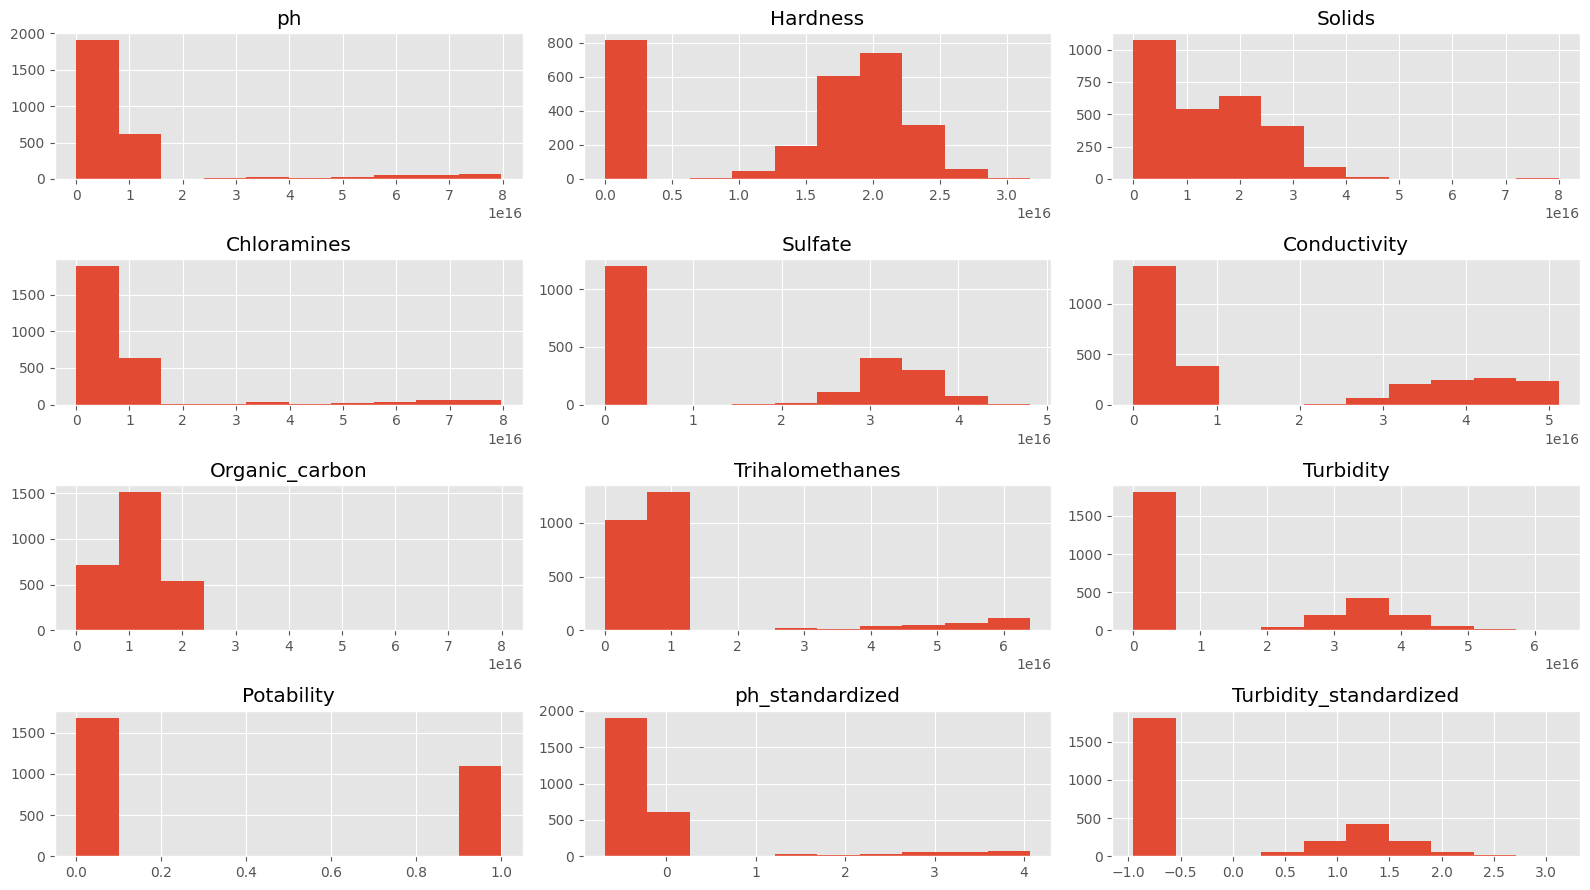

In [ ]:
df_agua.drop([], axis=1).hist()
plt.tight_layout()
plt.show()

# **Visualizamos Cantidad**

El siguiente código, podemos observar como el gráfico sirve para entender, de forma visual, cómo se comportan dos propiedades del agua y si están relacionadas. Así podemos tomar mejores decisiones para mejorar su calidad.

In [ ]:
#vamos a Visualizar los datos de entrada
colores = ['orange', 'blue']
tamanios = [30, 60]

#Vamos a pintar en 2 colores segun si el pH es mayor que la media
f1 = df_agua['ph'].values
f2 = df_agua['Turbidity'].values

# Pintar en 2 colores según si el pH es mayor que la media
asignar = []
for index, row in df_agua.iterrows():
    if row['ph'] > df_agua['ph'].mean():
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xlabel('pH')
plt.ylabel('Turbidez')
plt.title('Dispersión pH vs Turbidez')
plt.show()


El código carga, limpia datos de pH y Turbidez, manejando nulos.
Estandariza estas columnas para escalar sus valores a una distribución estándar.
Muestra estadísticas descriptivas antes y después de la estandarización para verificar los cambios


# **Procesamiento y Visualización de Datos de Agua Potable**

Prepara y visualiza datos de calidad del agua para facilitar su análisis estadístico y comparativo.

--- Iniciando Carga y Limpieza de Datos ---
Archivo 'agua_potable.xlsx' cargado correctamente.
Convirtiendo 'ph' y 'Turbidity' a numérico y manejando errores...
Eliminando filas con valores nulos en 'ph' o 'Turbidity'...

--- Resumen de 'ph' y 'Turbidity' después de la limpieza ---
                 ph     Turbidity
count  2.785000e+03  2.785000e+03
mean   1.149380e+16  1.483779e+16
std    1.678816e+16  1.561818e+16
min    0.000000e+00  1.450000e+00
25%    5.711213e+15  3.933565e+15
50%    7.009602e+15  4.682391e+15
75%    8.384296e+15  3.204796e+16
max    7.976901e+16  6.357439e+16

--- Iniciando Estandarización de Datos ---

--- Resumen de 'ph' y 'Turbidity' después de la estandarización ---
       ph_standardized  Turbidity_standardized
count      2785.000000            2.785000e+03
mean          0.000000            1.275660e-17
std           1.000180            1.000180e+00
min          -0.684760           -9.502041e-01
25%          -0.344506           -6.983008e-01
50%          -0.

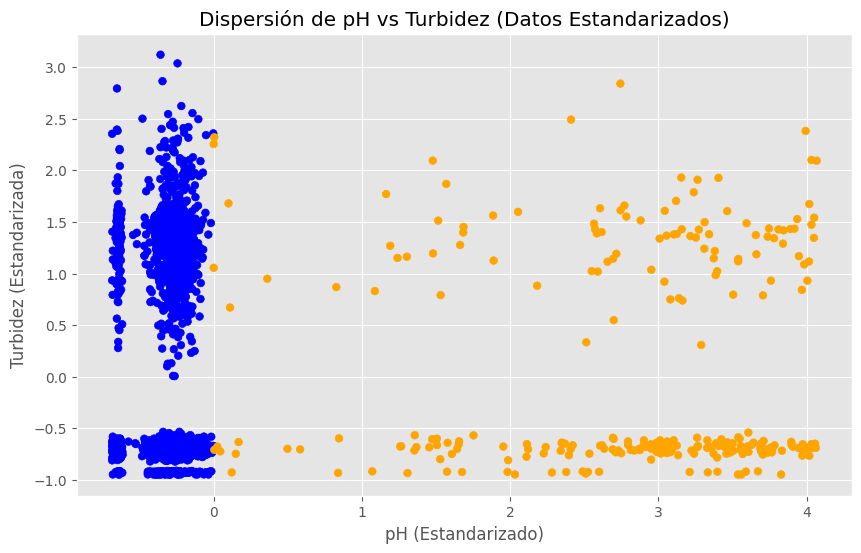

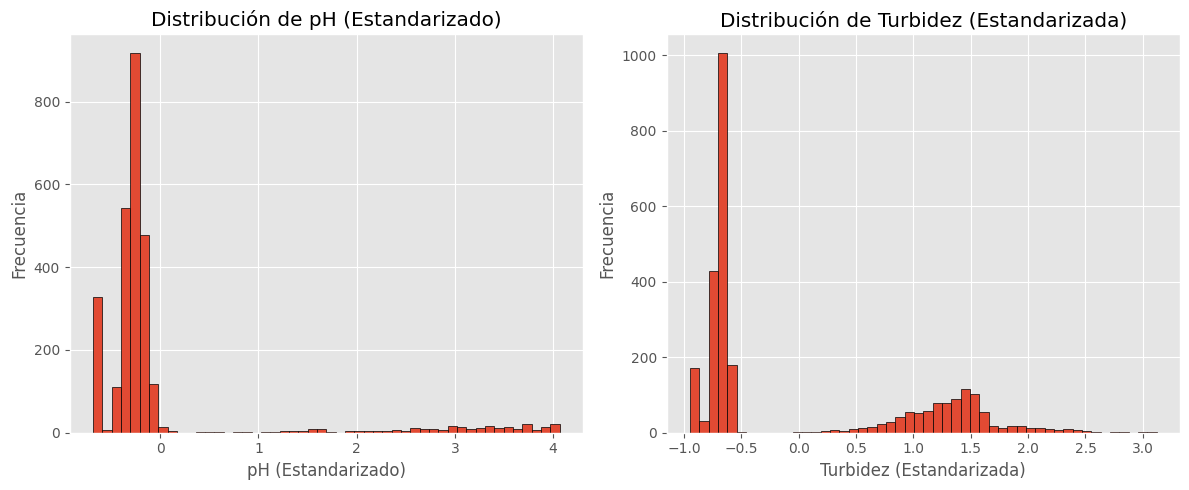


--- Proceso de Carga, Limpieza, Estandarización y Visualización completado ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns # Importar seaborn para violin plots si los necesitas más adelante

# --- Carga y Limpieza de Datos ---
print("--- Iniciando Carga y Limpieza de Datos ---")
try:
    # Cargamos los datos
    df_agua = pd.read_excel("agua_potable.xlsx")
    print("Archivo 'agua_potable.xlsx' cargado correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'agua_potable.xlsx' no se encontró. Asegúrate de que esté en la ubicación correcta.")
    # Si el archivo no se encuentra, terminamos el script de forma controlada
    exit()

# Convertimos a numérico las columnas relevantes, forzando errores a NaN
print("Convirtiendo 'ph' y 'Turbidity' a numérico y manejando errores...")
df_agua['ph'] = pd.to_numeric(df_agua['ph'], errors='coerce')
df_agua['Turbidity'] = pd.to_numeric(df_agua['Turbidity'], errors='coerce')

# Eliminamos filas que tengan valores nulos en 'ph' o 'Turbidity'
print("Eliminando filas con valores nulos en 'ph' o 'Turbidity'...")
df_agua.dropna(subset=['ph', 'Turbidity'], inplace=True)

# Mostramos un resumen de los datos después de la limpieza
print("\n--- Resumen de 'ph' y 'Turbidity' después de la limpieza ---")
print(df_agua[['ph', 'Turbidity']].describe())

# --- Estandarización de Datos ---
print("\n--- Iniciando Estandarización de Datos ---")

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Aplicamos el escalador a las columnas 'ph' y 'Turbidity'
# Los resultados estandarizados se guardan en nuevas columnas para mantener los originales
df_agua[['ph_standardized', 'Turbidity_standardized']] = scaler.fit_transform(df_agua[['ph', 'Turbidity']])

# Mostramos un resumen de los datos estandarizados
print("\n--- Resumen de 'ph' y 'Turbidity' después de la estandarización ---")
print(df_agua[['ph_standardized', 'Turbidity_standardized']].describe())

# --- Visualización con Datos Estandarizados ---
print("\n--- Iniciando Visualización con Datos Estandarizados ---")

# Configuramos colores y tamaños para la visualización de dispersión
colores = ['orange', 'blue']
tamanios = [30, 60]

# Obtenemos los valores estandarizados para el gráfico de dispersión
f1_std = df_agua['ph_standardized'].values
f2_std = df_agua['Turbidity_standardized'].values

# Asignamos colores basándonos en si el pH estandarizado es mayor que su media (cercana a 0)
asignar_std = []
mean_ph_standardized = df_agua['ph_standardized'].mean() # La media será muy cercana a 0
for ph_val in f1_std:
    if ph_val > mean_ph_standardized:
        asignar_std.append(colores[0]) # Naranja si el pH estandarizado es alto
    else:
        asignar_std.append(colores[1]) # Azul si el pH estandarizado es bajo

# Creamos y mostramos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(f1_std, f2_std, c=asignar_std, s=tamanios[0])
plt.xlabel('pH (Estandarizado)')
plt.ylabel('Turbidez (Estandarizada)')
plt.title('Dispersión de pH vs Turbidez (Datos Estandarizados)')
plt.grid(True) # Añadir una cuadrícula para mejor lectura
plt.show()

# Creamos y mostramos los histogramas de los datos estandarizados
plt.figure(figsize=(12, 5))

# Histograma para pH estandarizado
plt.subplot(1, 2, 1) # Posiciona el primer gráfico en una grilla de 1 fila, 2 columnas
df_agua['ph_standardized'].hist(bins=50, edgecolor='black') # Añadir bordes a las barras
plt.title("Distribución de pH (Estandarizado)")
plt.xlabel("pH (Estandarizado)")
plt.ylabel("Frecuencia")
plt.grid(True)

# Histograma para Turbidez estandarizada
plt.subplot(1, 2, 2) # Posiciona el segundo gráfico
df_agua['Turbidity_standardized'].hist(bins=50, edgecolor='black')
plt.title("Distribución de Turbidez (Estandarizada)")
plt.xlabel("Turbidez (Estandarizada)")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.tight_layout() # Ajusta el espaciado entre subplots
plt.show()

print("\n--- Proceso de Carga, Limpieza, Estandarización y Visualización completado ---")

# **Análisis y Visualización de la Distribución de Potabilidad del Agua**

Este código analiza cuántas muestras de agua son potables o no, mostrando su distribución en números, porcentajes y gráficos.
Ayuda a visualizar si el conjunto de datos está balanceado.


Distribución de la variable 'Potability':
Potability
0    1998
1    1278
Name: count, dtype: int64

Distribución porcentual de 'Potability':
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


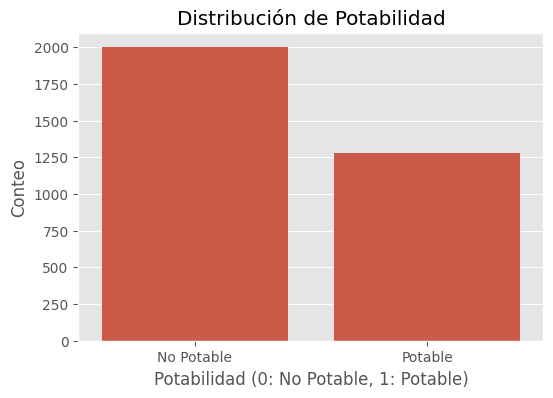

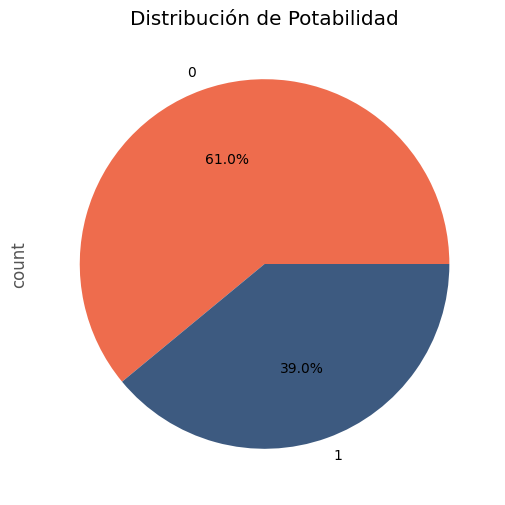

In [ ]:
# Contar la distribución de la variable objetivo
print("\nDistribución de la variable 'Potability':")
print(df_agua['Potability'].value_counts())

# Mostrar la distribución en porcentaje
print("\nDistribución porcentual de 'Potability':")
print(df_agua['Potability'].value_counts(normalize=True) * 100)

# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(6, 4))
# Asegúrate de que seaborn está importado como sns o usa el alias correcto (sb en el código original)
sb.countplot(x='Potability', data=df_agua) # Cambiado sns a sb
plt.title('Distribución de Potabilidad')
plt.xlabel('Potabilidad (0: No Potable, 1: Potable)')
plt.ylabel('Conteo')
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.show()

# Visualizar la distribución con un gráfico de pastel (ya lo tienes)
plt.figure(figsize=(6, 6))
plt.title("Distribución de Potabilidad")
df_agua['Potability'].value_counts().plot.pie(autopct="%1.1f%%", colors=['#ee6c4d', '#3d5a80']);
plt.show()

In [ ]:
# Ahora veamos algunas estadísticas de nuestros datos
df_agua.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_standardized,Turbidity_standardized
count,2.785000e+03,2.785000e+03,2.785000e+03,2.785000e+03,2.116000e+03,2.785000e+03,2.785000e+03,2.649000e+03,2.785000e+03,2785.000000,2785.000000,2.785000e+03
mean,1.149380e+16,1.433238e+16,1.380039e+16,1.129543e+16,1.602689e+16,1.736702e+16,1.128494e+16,1.161549e+16,1.483779e+16,0.395332,0.000000,1.275660e-17
std,1.678816e+16,8.506884e+15,1.086238e+16,1.622758e+16,1.512730e+16,1.797070e+16,7.156882e+15,1.537023e+16,1.561818e+16,0.489010,1.000180,1.000180e+00
min,0.000000e+00,4.743200e+04,1.841913e+13,5.303513e-01,2.670261e+12,4.143282e+12,2.048390e+12,7.380000e-01,1.450000e+00,0.000000,-0.684760,-9.502041e-01
25%,5.711213e+15,2.296032e+15,2.850822e+15,5.809436e+15,3.231468e+15,3.957133e+15,7.507662e+15,5.458074e+15,3.933565e+15,0.000000,-0.344506,-6.983008e-01
50%,7.009602e+15,1.796364e+16,1.372091e+16,7.121264e+15,3.788872e+15,5.150600e+15,1.273604e+16,6.898197e+15,4.682391e+15,0.000000,-0.267153,-6.503464e-01
75%,8.384296e+15,2.068897e+16,2.185699e+16,8.408832e+15,3.224381e+16,3.699032e+16,1.537952e+16,8.366233e+15,3.204796e+16,1.000000,-0.185253,1.102129e+00
max,7.976901e+16,3.173381e+16,7.998675e+16,7.967188e+16,4.810306e+16,5.115877e+16,7.996295e+16,6.394418e+16,6.357439e+16,1.000000,4.067598,3.121065e+00


Análisis preliminar del dataset

Se observan valores numéricos extremadamente altos (en el orden de 10^16),
lo cual sugiere posibles errores en la carga o representación de los datos.
Es probable que se requiera una normalización o revisión del archivo original.

En cuanto a la variable objetivo (calidad del agua), los datos indican que aproximadamente el 39% de las muestras son clasificadas como "aceptables" y el 61% como "no aceptables", lo que muestra un desbalance de clases.Esto es importante considerarlo en el entrenamiento del modelo para evitar sesgos

# **4. Limpieza y Preprocesamiento**
Cargamos los datos y obtenemos una idea general de su estructura, tipos de datos y un resumen estadístico básico. Esto nos ayuda a identificar columnas numéricas y no numéricas, y a detectar posibles problemas como valores atípicos

**Verificación y Manejo de Valores Nulos**

Es crucial saber cuántos valores faltan y dónde.


Valores nulos por columna:
ph                          0
Hardness                    0
Solids                      0
Chloramines                 0
Sulfate                   669
Conductivity                0
Organic_carbon              0
Trihalomethanes           136
Turbidity                   0
Potability                  0
ph_standardized             0
Turbidity_standardized      0
dtype: int64

Porcentaje de valores nulos por columna:
ph                         0.000000
Hardness                   0.000000
Solids                     0.000000
Chloramines                0.000000
Sulfate                   24.021544
Conductivity               0.000000
Organic_carbon             0.000000
Trihalomethanes            4.883303
Turbidity                  0.000000
Potability                 0.000000
ph_standardized            0.000000
Turbidity_standardized     0.000000
dtype: float64

Distribución de la variable 'Potability':
Potability
0    1684
1    1101
Name: count, dtype: int64

Distribuc

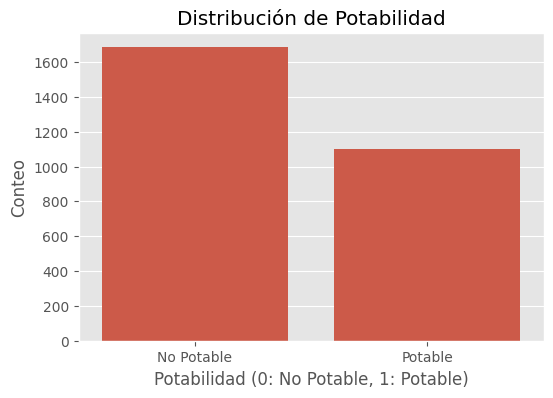

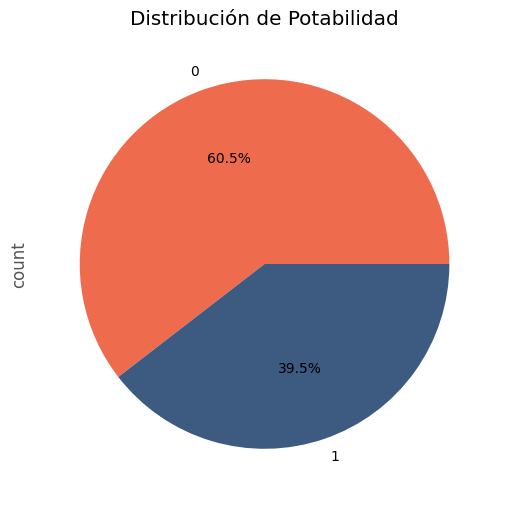

In [ ]:
# Contar valores nulos por columna
print("\nValores nulos por columna:")
print(df_agua.isnull().sum())

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos por columna:")
print(df_agua.isnull().sum() / len(df_agua) * 100)
# Contar la distribución de la variable objetivo
print("\nDistribución de la variable 'Potability':")
print(df_agua['Potability'].value_counts())

# Mostrar la distribución en porcentaje
print("\nDistribución porcentual de 'Potability':")
print(df_agua['Potability'].value_counts(normalize=True) * 100)

# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(6, 4))
# Asegúrate de que seaborn está importado como sns o usa el alias correcto (sb en el código original)
sb.countplot(x='Potability', data=df_agua) # Cambiado sns a sb
plt.title('Distribución de Potabilidad')
plt.xlabel('Potabilidad (0: No Potable, 1: Potable)')
plt.ylabel('Conteo')
plt.xticks([0, 1], ['No Potable', 'Potable'])
plt.show()

# Visualizar la distribución con un gráfico de pastel (ya lo tienes)
plt.figure(figsize=(6, 6))
plt.title("Distribución de Potabilidad")
df_agua['Potability'].value_counts().plot.pie(autopct="%1.1f%%", colors=['#ee6c4d', '#3d5a80']);
plt.show()
# Ya tienes una línea para eliminar nulos, pero es bueno mostrarlo:
# df_agua.dropna(inplace=True)
# print("\nForma del DataFrame después de eliminar nulos:", df_agua.shape)

# **Visualización de Distribuciones y Valores Atípicos en Variables Numéricas**

Este código selecciona las columnas numéricas (excluyendo la variable objetivo 'Potability') y visualiza su distribución usando histogramas y boxplots para detectar valores extremos y patrones.


Columnas numéricas para análisis de distribución: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


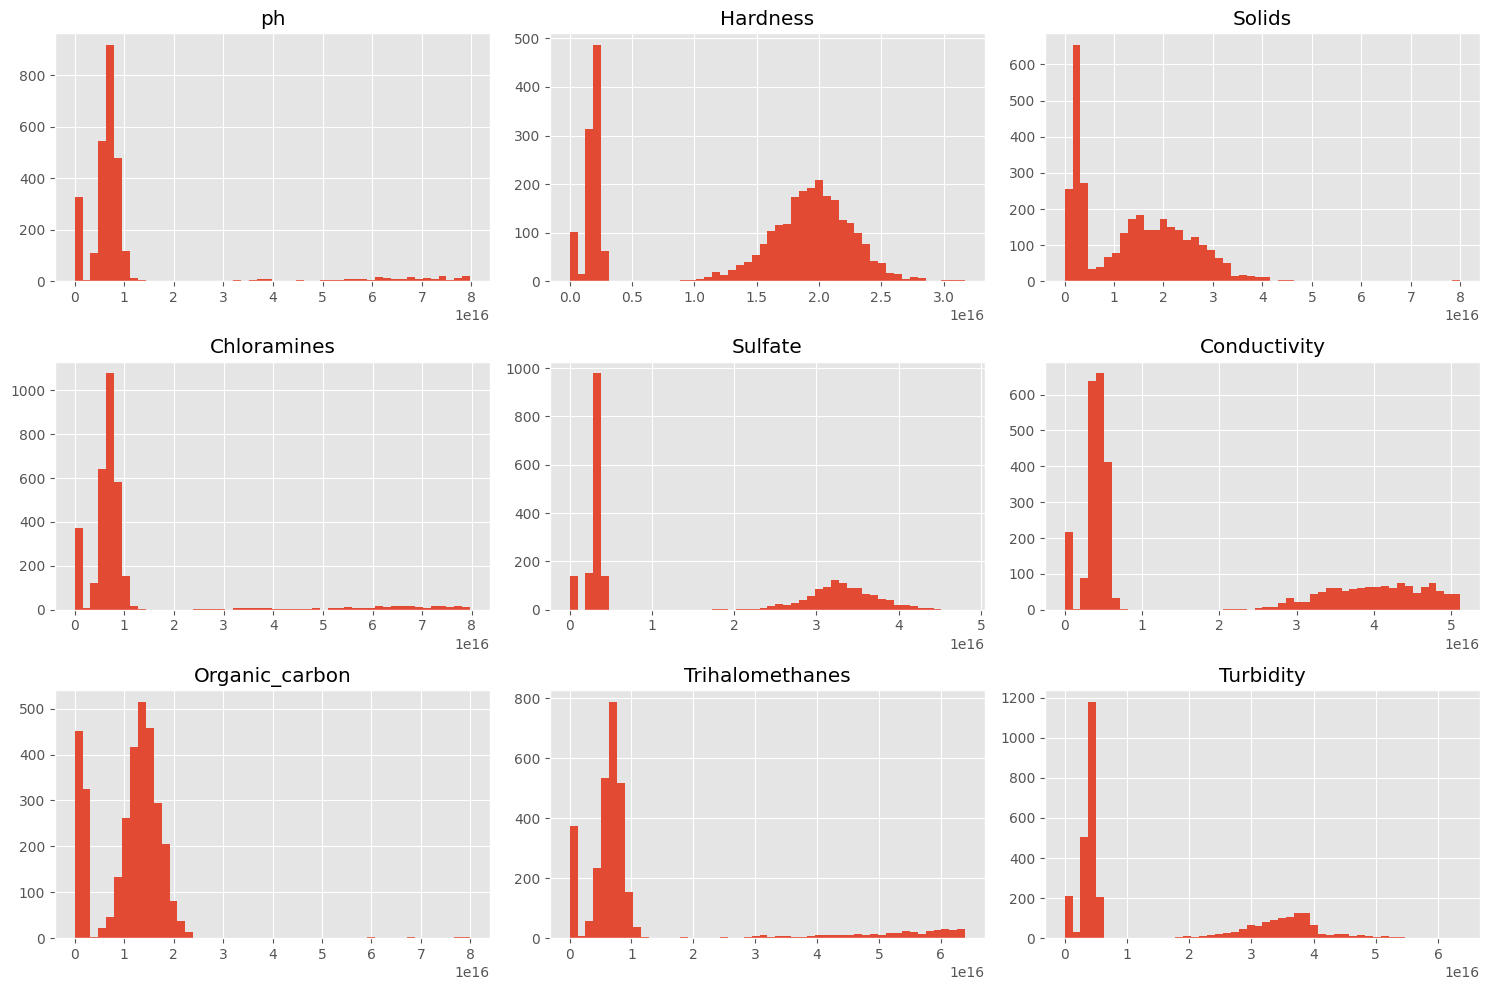

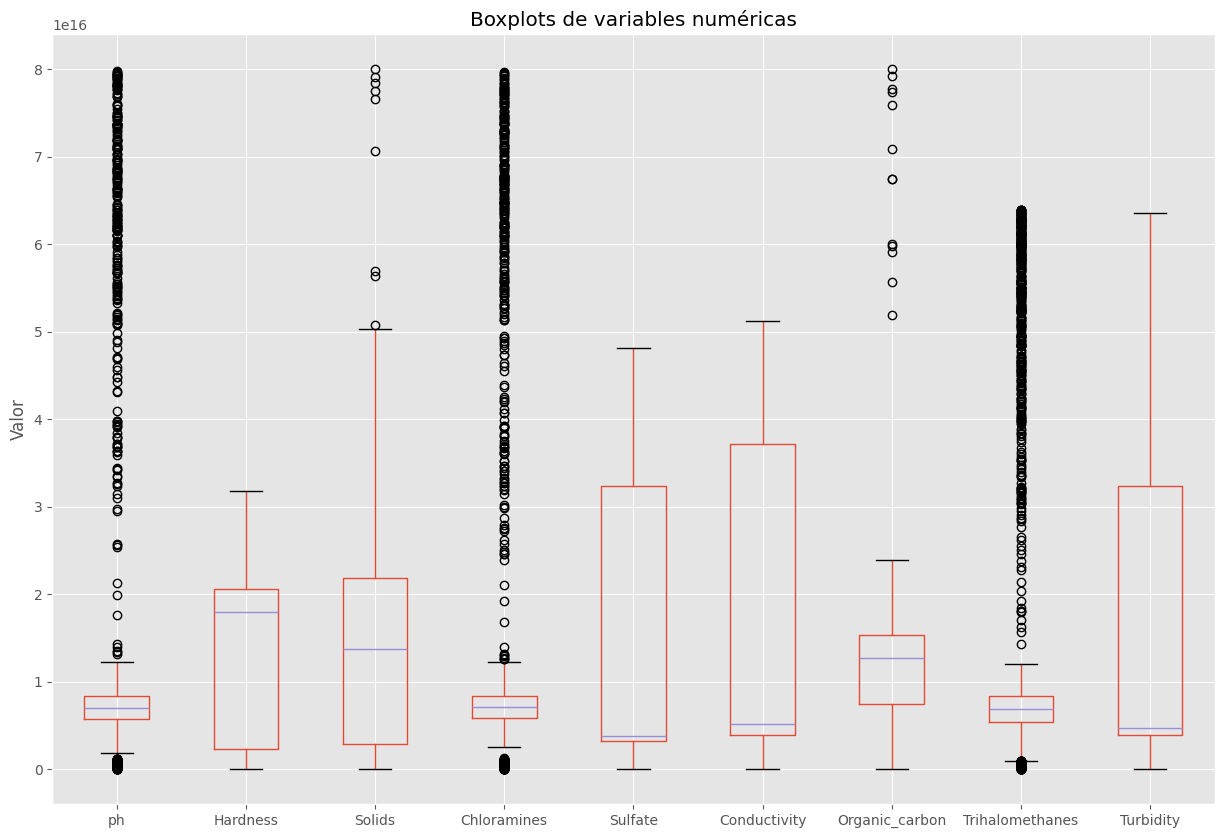

In [ ]:
# Seleccionar columnas numéricas (excluyendo la variable objetivo si es numérica)
# Asegúrate de que 'Potability' no se incluya si la tratas como categórica en el análisis de distribución
numeric_cols = df_agua.select_dtypes(include=np.number).columns.tolist()
if 'Potability' in numeric_cols:
    numeric_cols.remove('Potability') # Eliminar si es la variable objetivo

print(f"\nColumnas numéricas para análisis de distribución: {numeric_cols}")

# Crear histogramas para cada columna numérica
df_agua[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout() # Ajusta el espacio entre gráficos
plt.show()

# O usar boxplots para ver distribuciones y valores atípicos
plt.figure(figsize=(15, 10))
df_agua[numeric_cols].boxplot()
plt.title('Boxplots de variables numéricas')
plt.ylabel('Valor')
plt.show()

**Relaciones entre Variables Numéricas**

Observar cómo se relacionan las variables predictoras entre sí y con la variable objetivo.


Matriz de correlación:
                              ph  Hardness    Solids  Chloramines   Sulfate  \
ph                      1.000000 -0.006366 -0.008614    -0.013818 -0.008187   
Hardness               -0.006366  1.000000  0.009427    -0.011950  0.003103   
Solids                 -0.008614  0.009427  1.000000     0.001163 -0.017814   
Chloramines            -0.013818 -0.011950  0.001163     1.000000 -0.037630   
Sulfate                -0.008187  0.003103 -0.017814    -0.037630  1.000000   
Conductivity           -0.013318  0.028602 -0.033189    -0.009207 -0.016747   
Organic_carbon          0.005737  0.015486  0.017903     0.001882 -0.031467   
Trihalomethanes        -0.013043 -0.004050 -0.012046    -0.009583  0.005366   
Turbidity               0.006700  0.020148  0.000224    -0.002556 -0.030172   
ph_standardized         1.000000 -0.006366 -0.008614    -0.013818 -0.008187   
Turbidity_standardized  0.006700  0.020148  0.000224    -0.002556 -0.030172   
Potability              0.01

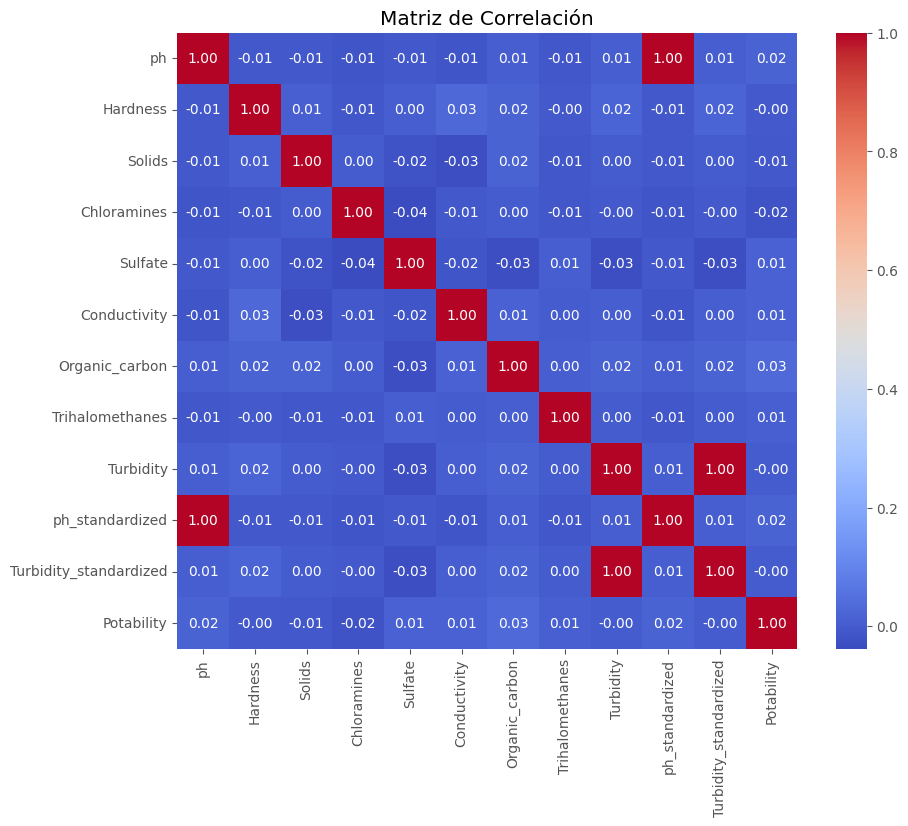

In [ ]:
# Relaciones entre Variables Numéricas: # Matriz de correlación
print("\nMatriz de correlación:")

numeric_cols = df_agua.select_dtypes(include=np.number).columns.tolist()
if 'Potability' in numeric_cols:
    numeric_cols.remove('Potability') # Eliminar si es la variable objetivo
# --- End of definition ---

correlation_matrix = df_agua[numeric_cols + ['Potability']].corr() # Incluir Potability si es numérica
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))

sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Scatter plots para ver relaciones entre pares de variables pH vs Turbidity
# sb.scatterplot(x='ph', y='Turbidity', hue='Potability', data=df_agua)
# plt.show()

# plt.figure(figsize=(8, 6))
# sb.scatterplot(x='Hardness', y='Solids', hue='Potability', data=df_agua)
# plt.title('Hardness vs Solids por Potabilidad')
# plt.xlabel('Hardness')
# plt.ylabel('Solids')
# plt.show()

**Análisis Bivariado con la Variable Objetivo**

Observar cómo se distribuyen las variables predictoras en función de la variable objetivo ('Potability').

Generando boxplots para 11 columnas numéricas en una cuadrícula de 4x3.


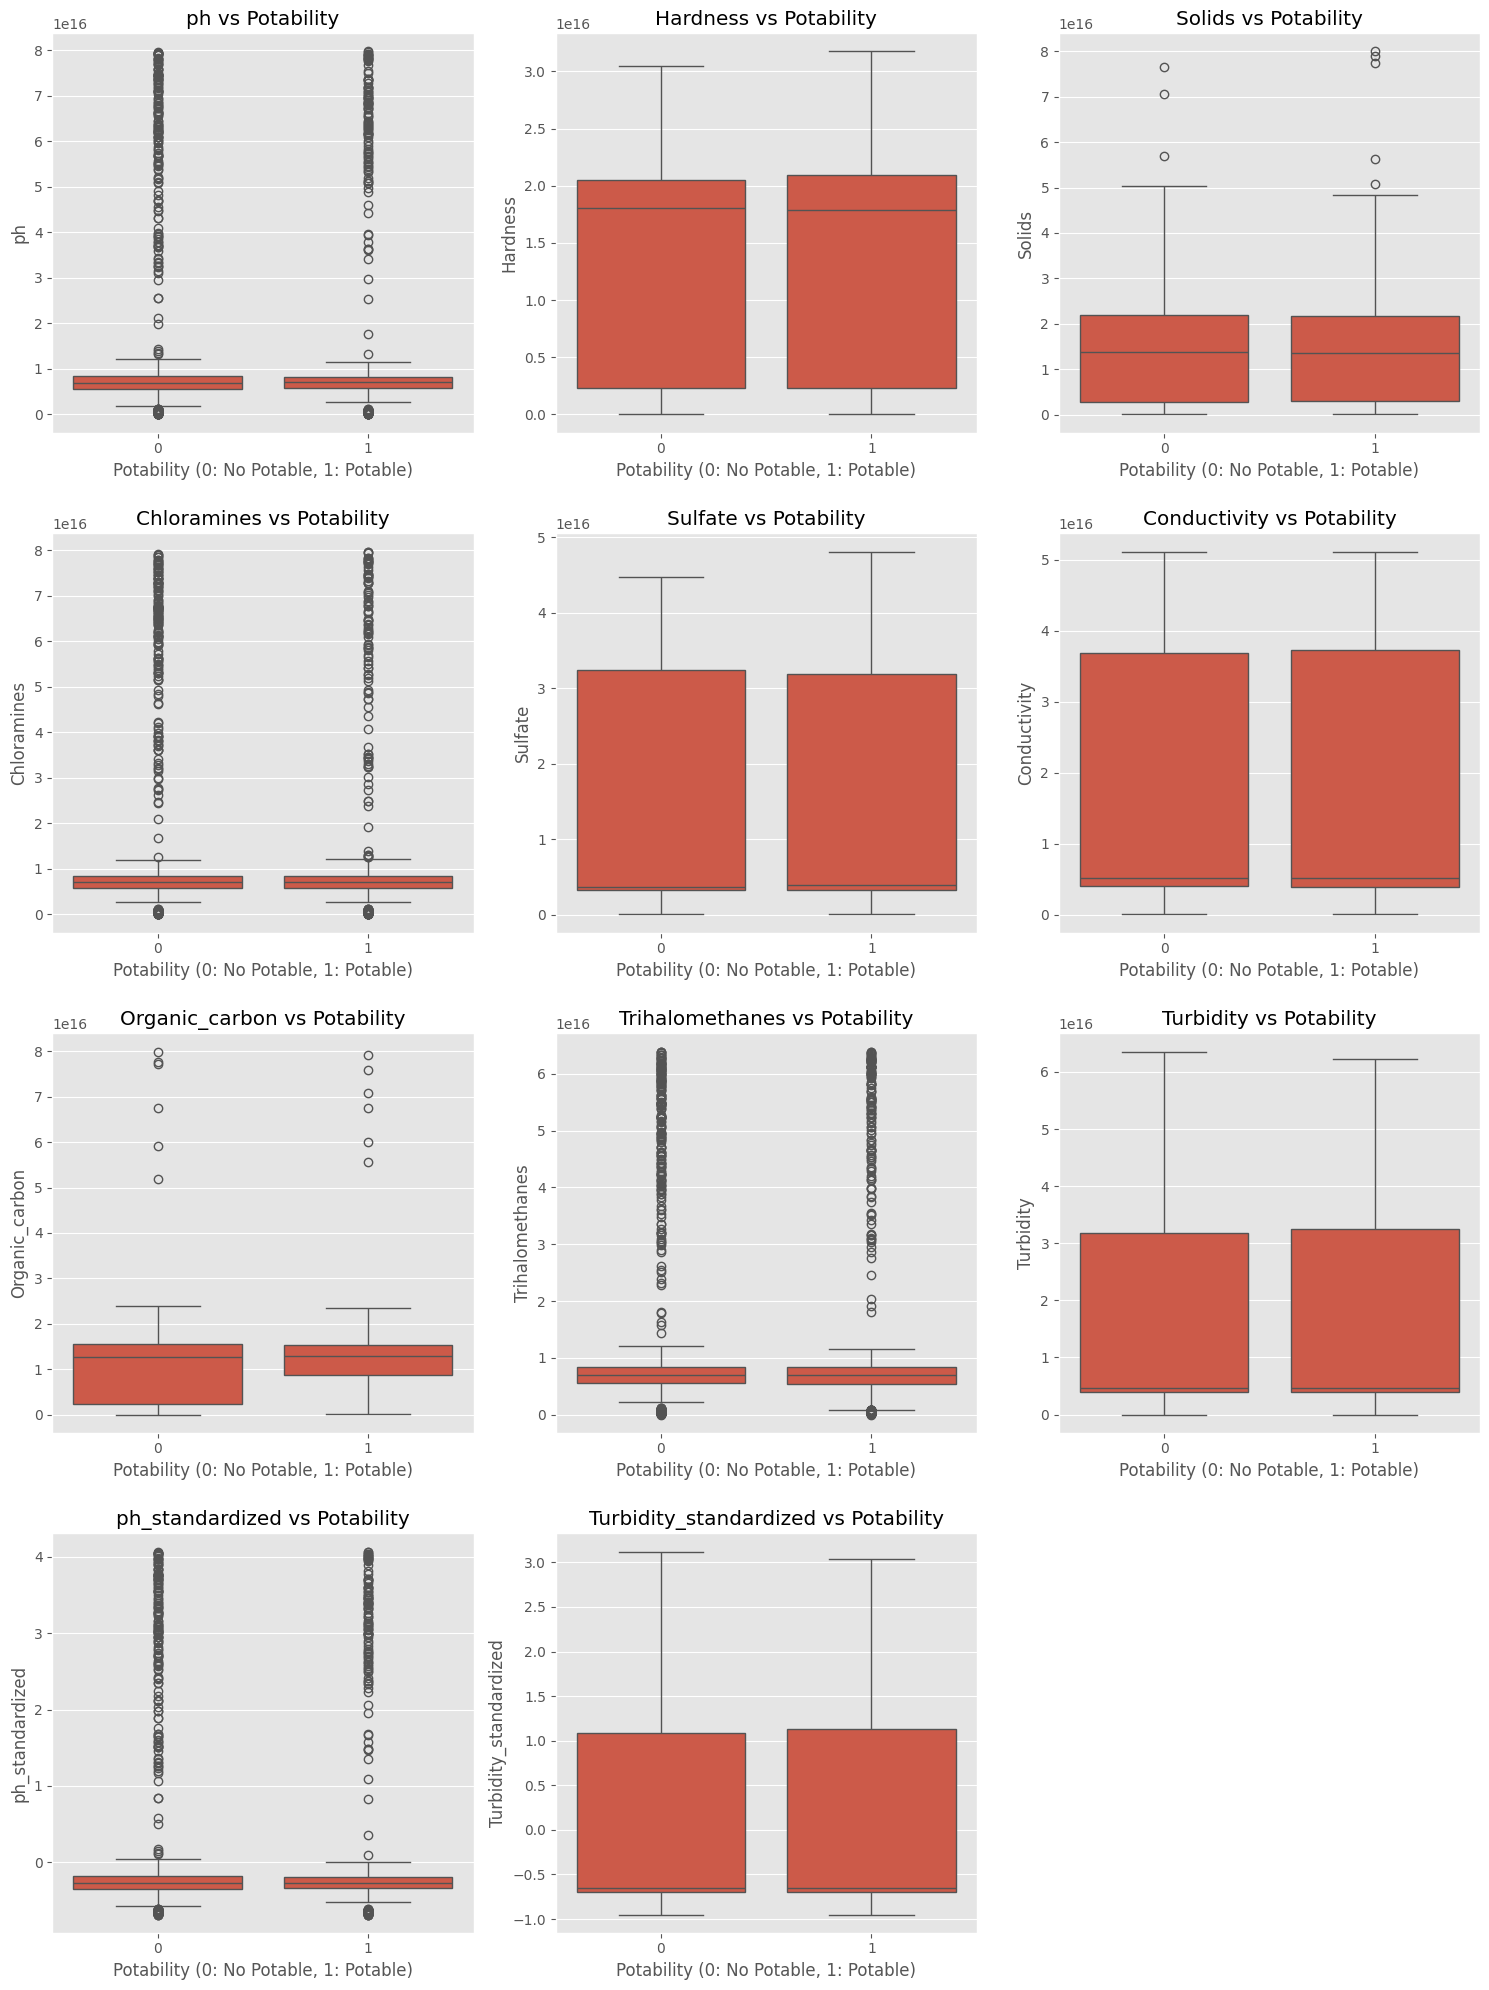

In [ ]:
# Boxplots de variables numéricas vs Potability
plt.figure(figsize=(15, 20)) # Ajusta el tamaño de la figura para una cuadrícula más grande
num_cols = len(numeric_cols)
# Calcular el número de filas y columnas necesarias para la cuadrícula
# Usamos ceil para asegurarnos de que hay suficientes filas para todos los plots
num_rows = (num_cols + 2) // 3 # Divide por 3 y redondea hacia arriba

print(f"Generando boxplots para {num_cols} columnas numéricas en una cuadrícula de {num_rows}x3.")

for i, col in enumerate(numeric_cols):
        # Ajusta el índice del subplot (va de 1 al número total de subplots)
    plt.subplot(num_rows, 3, i + 1)
    sb.boxplot(x='Potability', y=col, data=df_agua)
    plt.title(f'{col} vs Potability')
    plt.xlabel('Potability (0: No Potable, 1: Potable)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# sb.violinplot(x=characteristic, y='ph', data=df_agua_filtrado, palette='viridis')
# plt.title(f'Distribución de {characteristic} por pH (Solo datos aceptables y filtrados)')
# plt.xlabel(characteristic)
# plt.ylabel('pH')
# plt.show()

# Análisis de Agrupamiento (Clustering) para Descubrir Patrones de Calidad del Agua

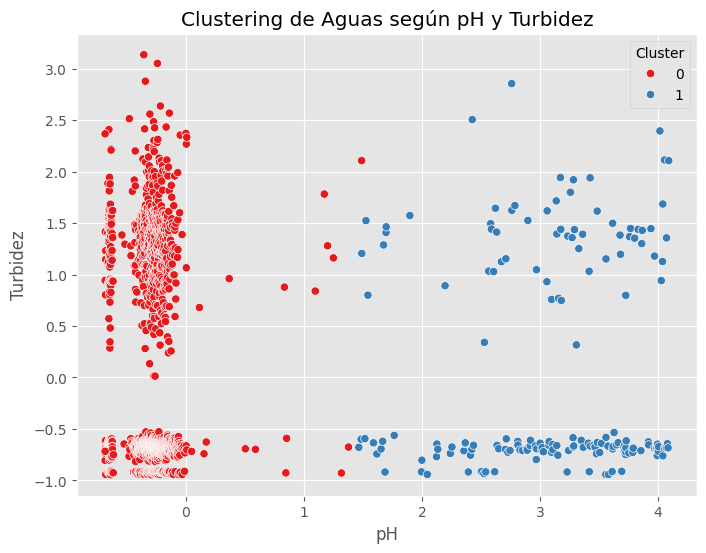

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que el DataFrame está limpio
df_cluster = df_agua.dropna()

# Eliminar la variable objetivo (no se usa en clustering)
if 'Potability' in df_cluster.columns:
    df_cluster = df_cluster.drop(columns='Potability')

# Escalar los datos para clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Elegir número de clusters (puedes probar varios, aquí usamos 2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al DataFrame original
df_agua['Cluster'] = clusters

# Visualizar en 2D (puedes elegir otras dos variables si lo prefieres)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_agua['ph'], y=df_agua['Turbidity'], hue=df_agua['Cluster'], palette='Set1')
plt.title('Clustering de Aguas según pH y Turbidez')
plt.xlabel('pH')
plt.ylabel('Turbidez')
plt.grid(True)
plt.show()


# **Modelado de Clasificacion**

# Regresion lineal

In [ ]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_agua[['ph', 'Solids', 'Conductivity', 'Sulfate']]  # Puedes ajustar estas columnas
y = df_agua['Turbidity']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Hacer predicciones
y_pred = modelo.predict(X_test)

In [ ]:
# Evaluar el modelo
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred)) # Use the dedicated function for RMSE
print("R²:", r2_score(y_test, y_pred))

MAE: 0.41929142546268894
MSE: 0.40744941746319197
RMSE: 0.6383176462100918
R²: -0.6949298816858647


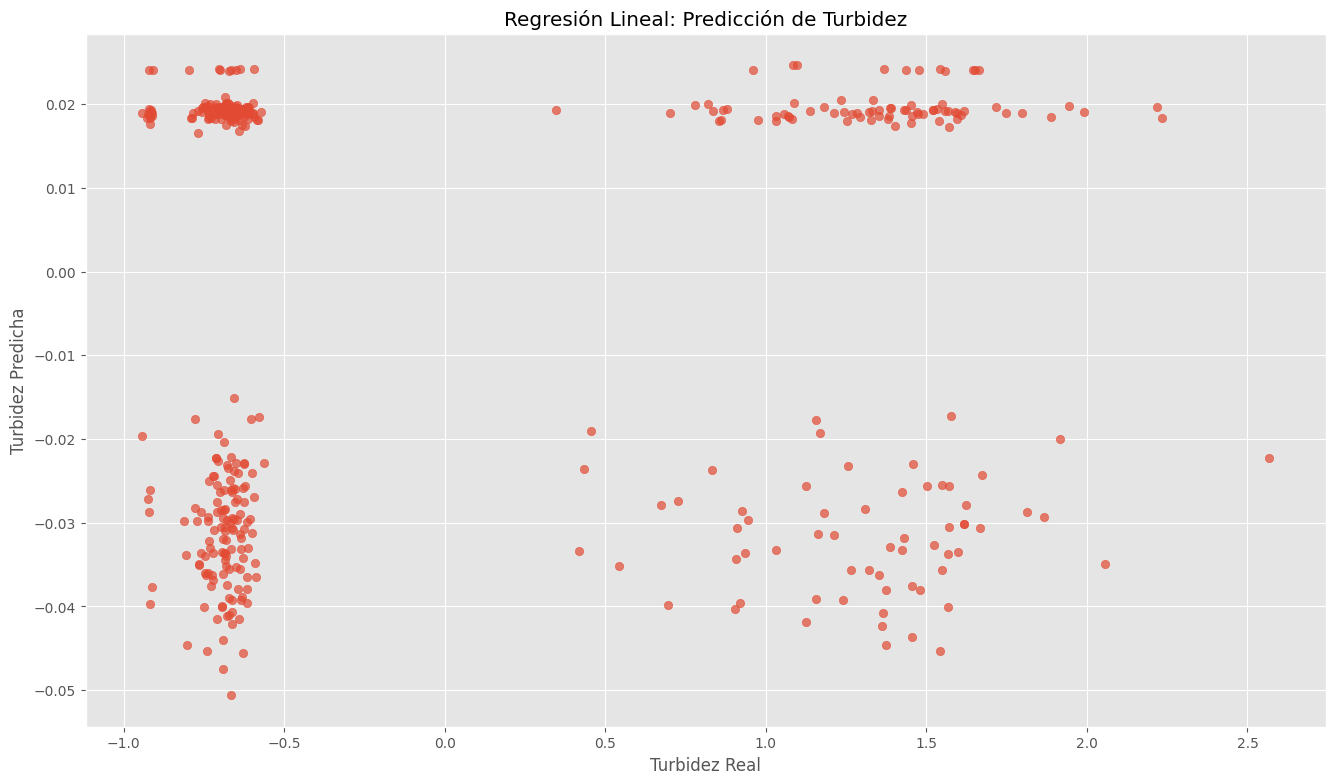

In [ ]:
#Visualizar resultados
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Turbidez Real")
plt.ylabel("Turbidez Predicha")
plt.title("Regresión Lineal: Predicción de Turbidez")
plt.grid(True)
plt.show()

# **Visualización y Regresión Lineal como Modelo Base para Clasificación de Potabilidad**

Se exploran diferencias entre aguas potables y no potables mediante boxplots y se aplica regresión lineal para predecir la potabilidad, evaluando su desempeño como clasificador

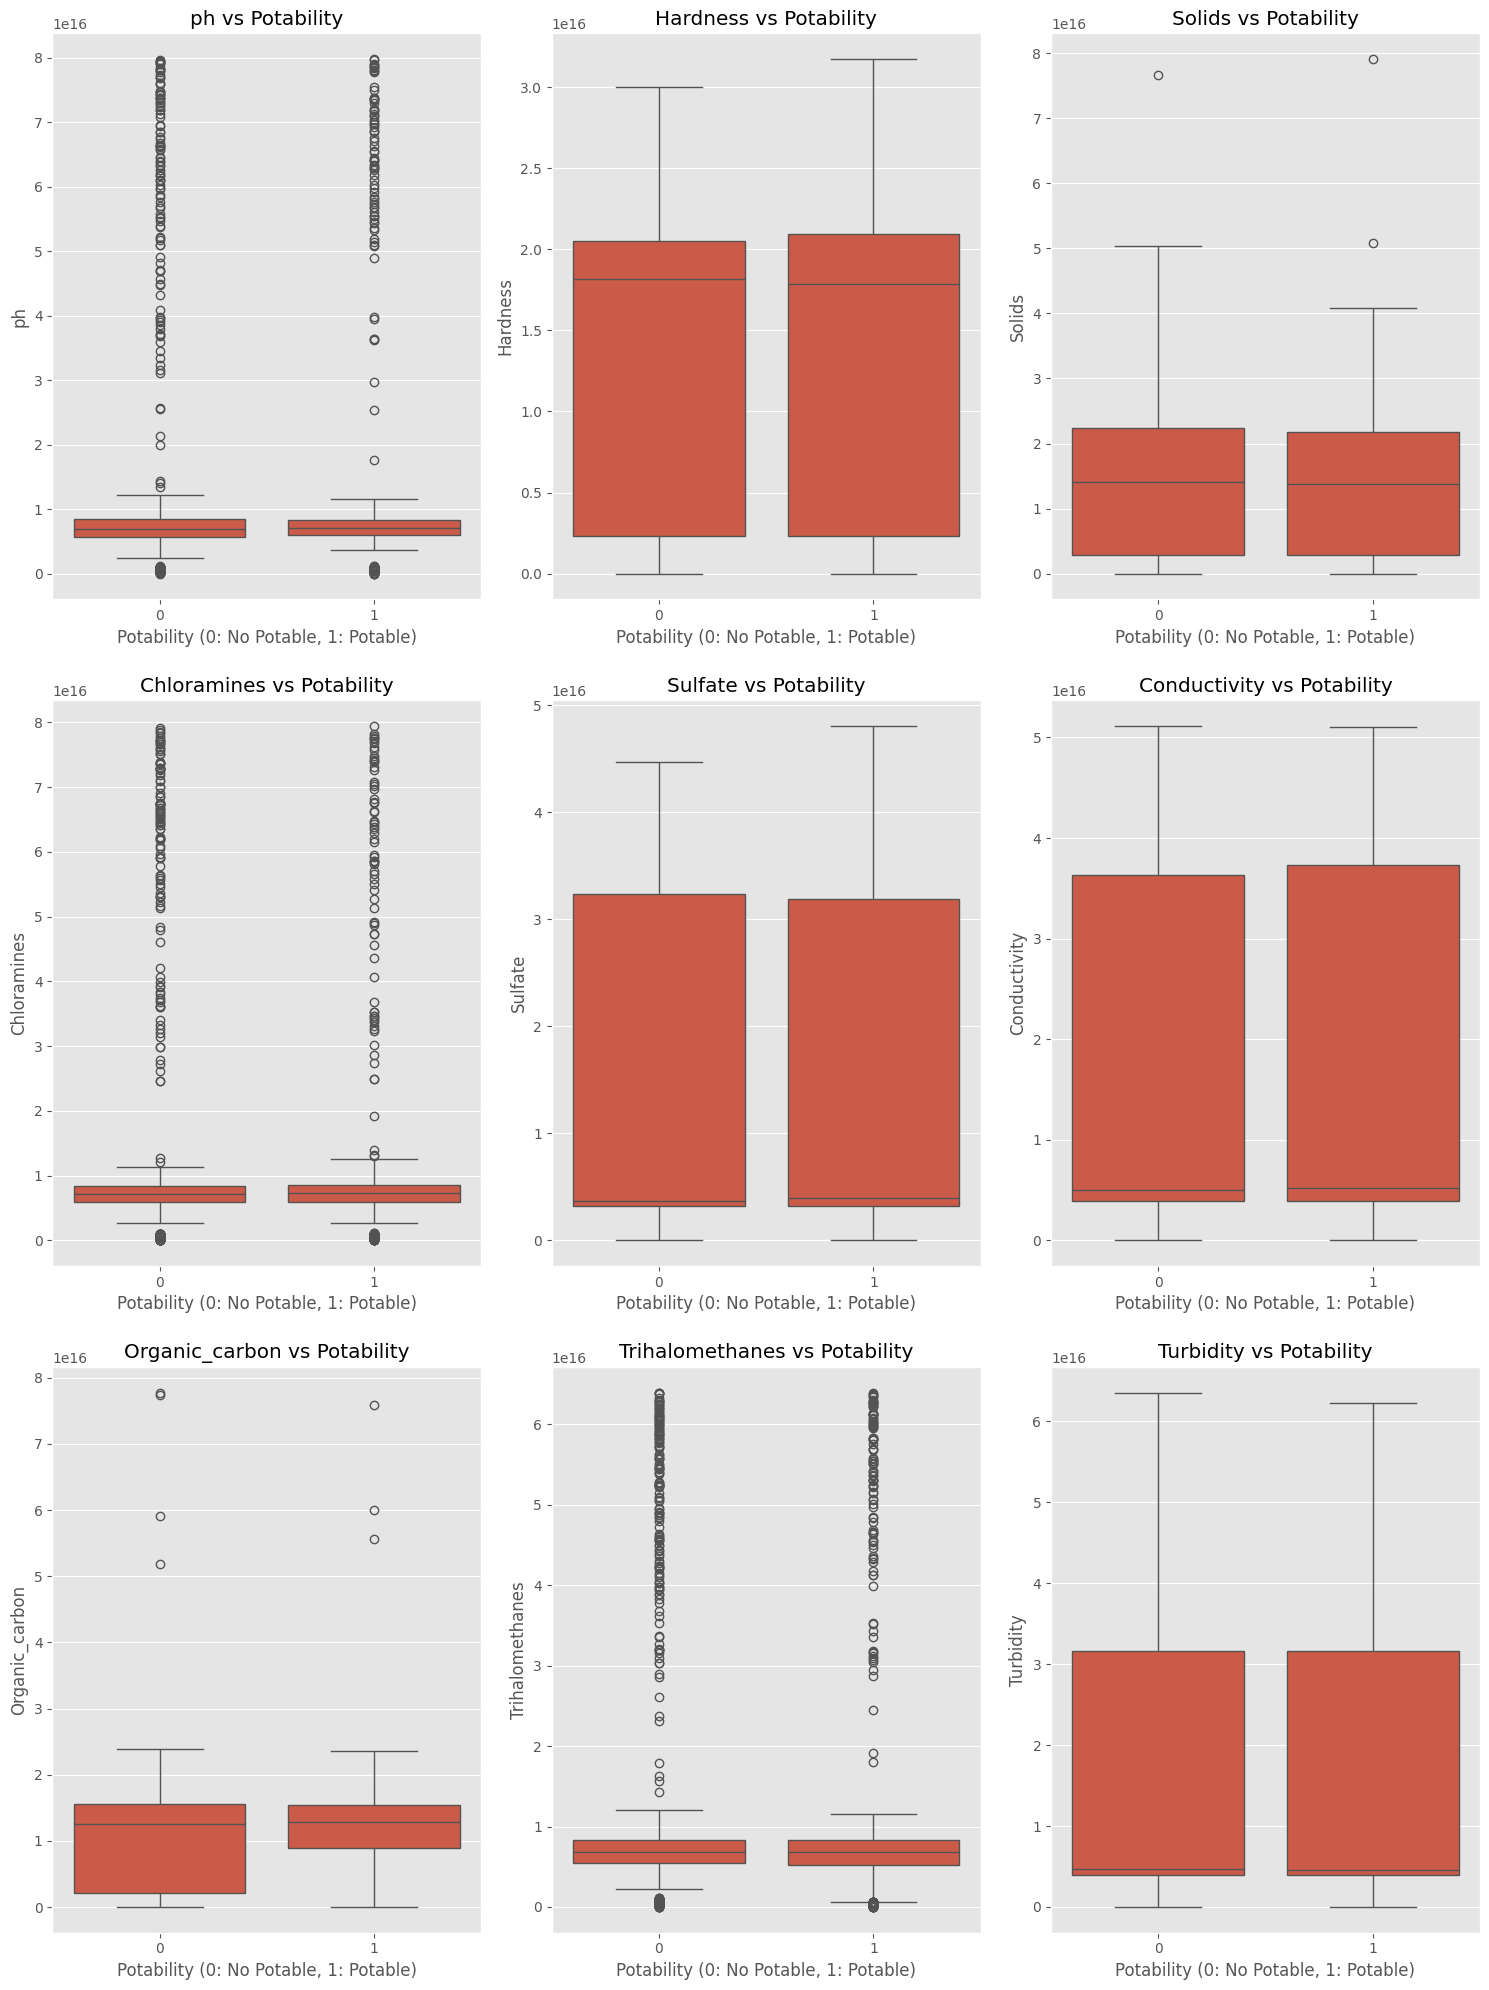

In [ ]:
# --- 1. Importación de librerías necesarias ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- 2. Carga y limpieza de datos ---
try:
    df_agua = pd.read_excel("agua_potable.xlsx")
    df_agua.dropna(inplace=True)
except FileNotFoundError:
    print("Error: archivo no encontrado.")
    exit()

# --- 3. Visualización: Boxplots por Potability ---
numeric_cols = df_agua.select_dtypes(include=np.number).columns.tolist()
if 'Potability' in numeric_cols:
    numeric_cols.remove('Potability')

plt.figure(figsize=(15, 20))
num_rows = (len(numeric_cols) + 2) // 3

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1)
    sb.boxplot(x='Potability', y=col, data=df_agua)
    plt.title(f'{col} vs Potability')
    plt.xlabel('Potability (0: No Potable, 1: Potable)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



--- Evaluación del Modelo de Regresión Lineal ---
MSE: 0.2404300167395159
R²: -0.00015364450202404178
Precisión como clasificador: 0.5955334987593052


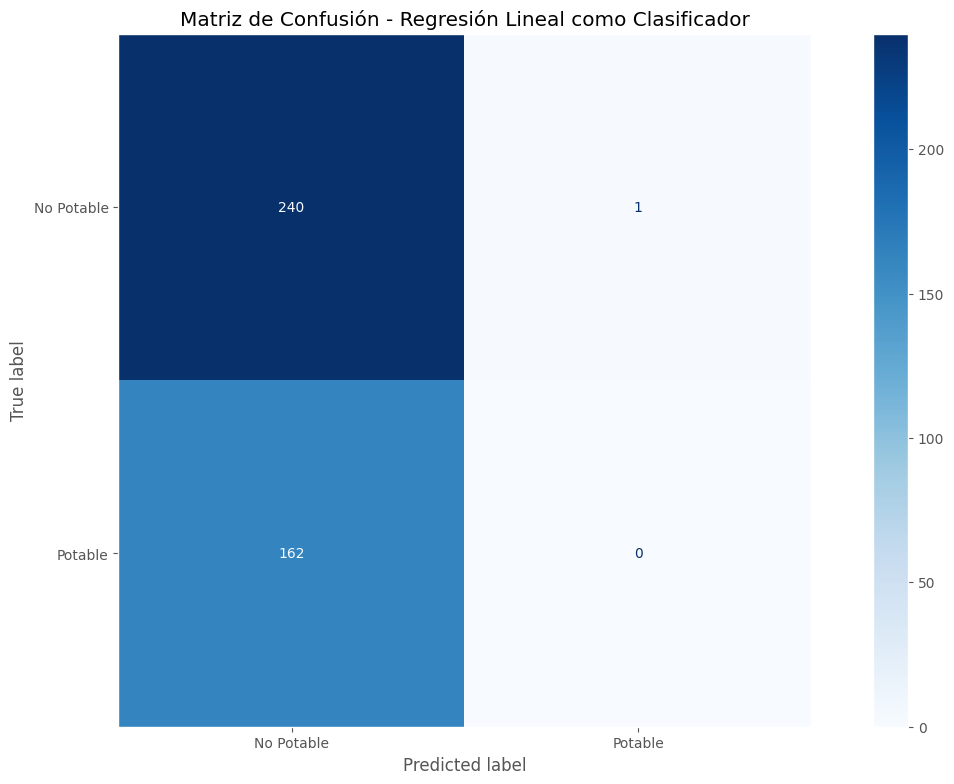

In [ ]:
# --- 4. Regresión Lineal como modelo base de clasificación ---
X = df_agua.drop(columns=['Potability'])
y = df_agua['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

# --- 5. Evaluación del modelo ---
y_pred_bin = [1 if val >= 0.5 else 0 for val in y_pred_lineal]

print("\n--- Evaluación del Modelo de Regresión Lineal ---")
print("MSE:", mean_squared_error(y_test, y_pred_lineal))
print("R²:", r2_score(y_test, y_pred_lineal))
print("Precisión como clasificador:", accuracy_score(y_test, y_pred_bin))

cm = confusion_matrix(y_test, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Potable', 'Potable'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Lineal como Clasificador")
plt.grid(False)
plt.show()


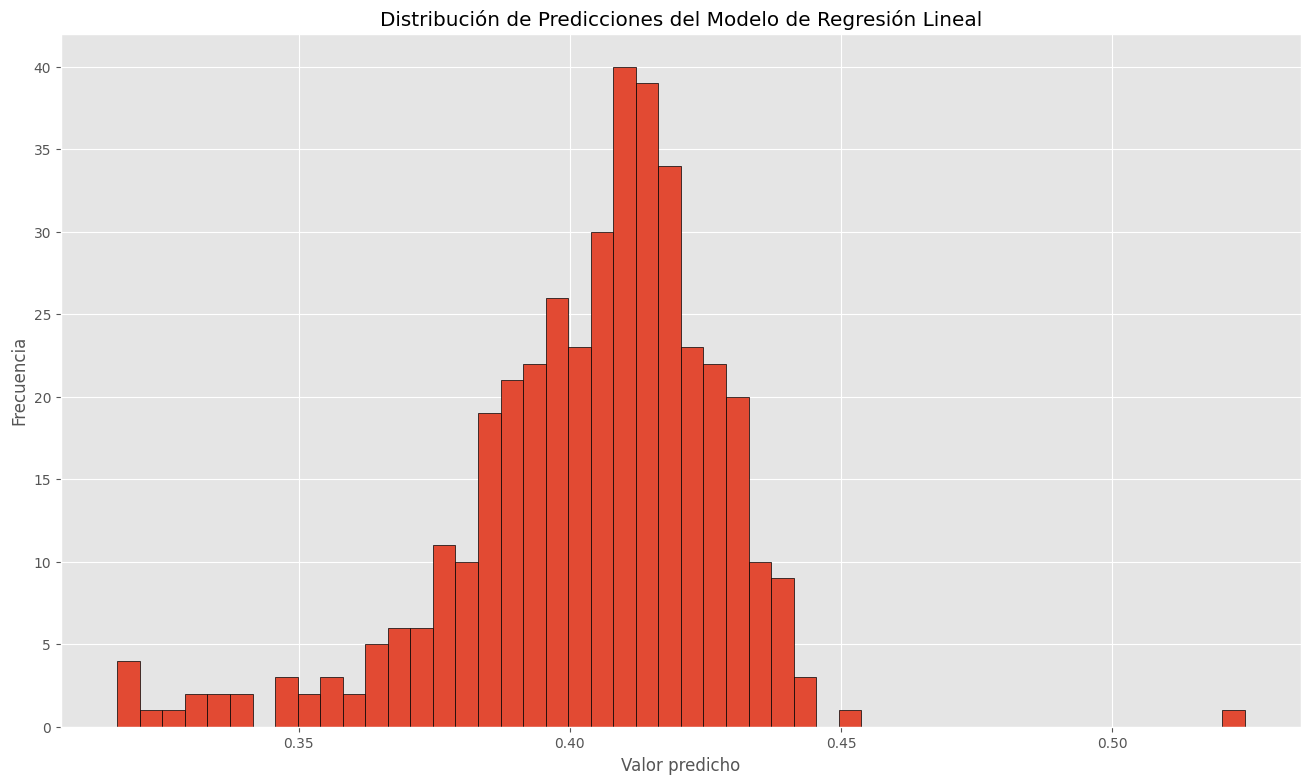

In [ ]:
# Distribución de predicciones
plt.hist(y_pred_lineal, bins=50, edgecolor='black')
plt.title("Distribución de Predicciones del Modelo de Regresión Lineal")
plt.xlabel("Valor predicho")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

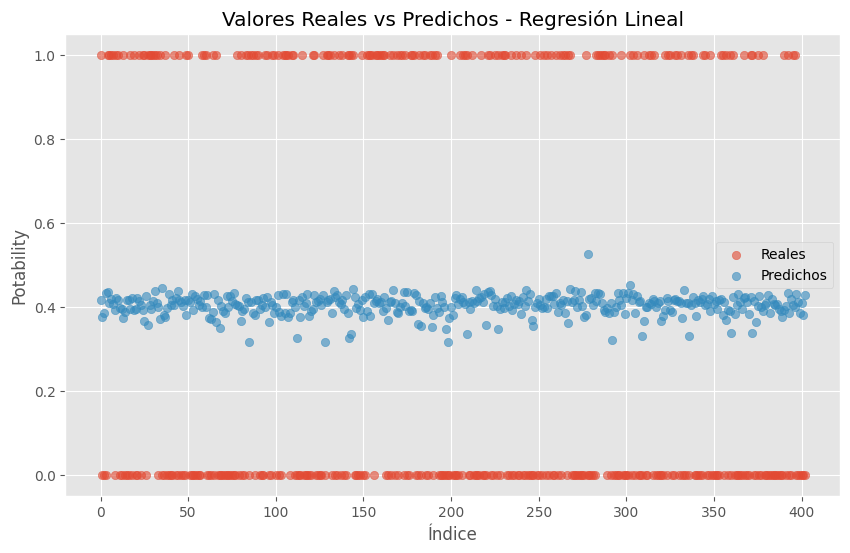

In [ ]:
# Reales vs Predichos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Reales', alpha=0.6)
plt.scatter(range(len(y_pred_lineal)), y_pred_lineal, label='Predichos', alpha=0.6)
plt.title("Valores Reales vs Predichos - Regresión Lineal")
plt.xlabel("Índice")
plt.ylabel("Potability")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler # Asegúrate de que StandardScaler esté importado si no lo está ya

scaler = StandardScaler()
scaler.fit(X) # X contiene todas las características excepto 'Potability'

# Ahora transformar la nueva muestra usando el escalador correctamente ajustado
nueva_muestra = [[6.8, 200, 15000, 7.0, 320, 420, 10.0, 80.0, 4.0]]  # 9 valores
nueva_muestra_escalada = scaler.transform(nueva_muestra)

# Hacer la predicción con la muestra escalada
y_pred = modelo_lineal.predict(nueva_muestra_escalada)
print("Predicción continua:", float(y_pred[0]))
y_pred_binary = 1 if y_pred[0] >= 0.5 else 0
print("Predicción binaria:", y_pred_binary)

Predicción continua: 0.4055004288608937
Predicción binaria: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Regresion logistica**

Predice si el agua es potable o no, usando variables físico-químicas. Luego se evalúa con métricas de clasificación como precisión y matriz de confusión.

Precisión: 0.598014888337469

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       241
           1       0.00      0.00      0.00       162

    accuracy                           0.60       403
   macro avg       0.30      0.50      0.37       403
weighted avg       0.36      0.60      0.45       403



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


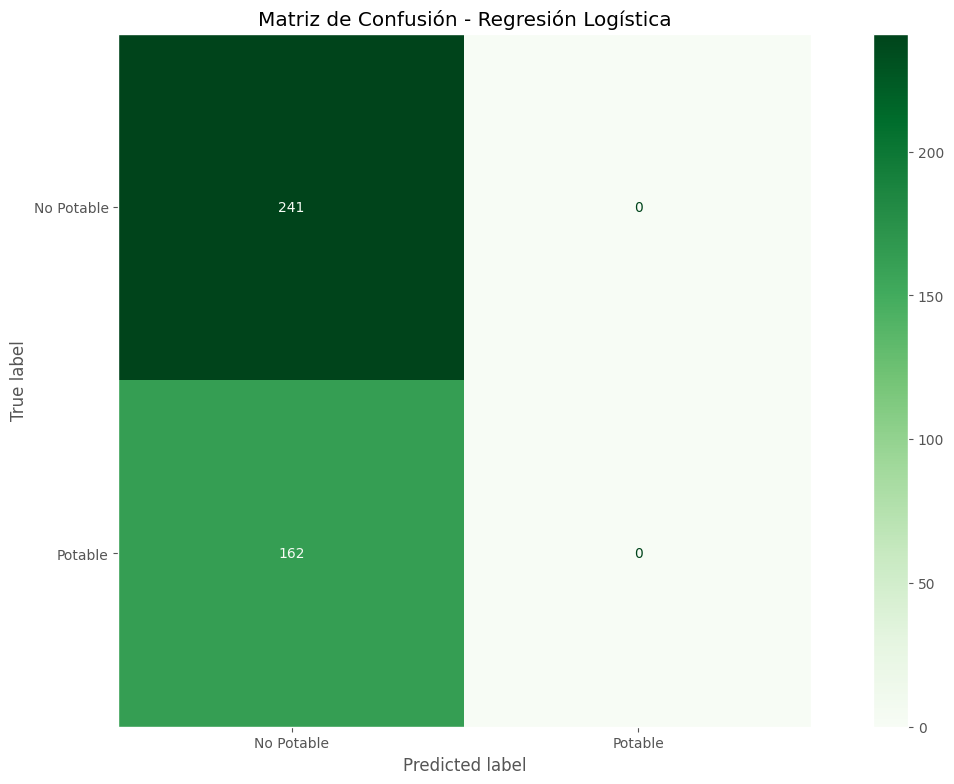

In [ ]:
# 1. Definir X (variables predictoras) e y (variable objetivo)
X = df_agua.drop(columns=['Potability'])
y = df_agua['Potability']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred_log = modelo_log.predict(X_test)

# 5. Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred_log))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_log))

# 6. Matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['No Potable', 'Potable'])
disp_log.plot(cmap='Greens')
plt.title("Matriz de Confusión - Regresión Logística")
plt.grid(False)
plt.show()

# Regresion lineal multiple

In [ ]:
# Crear variable combinada (como se hacía con enlaces, comentarios e imágenes) ---
suma = df_agua["Hardness"].fillna(0) + df_agua["Solids"].fillna(0)  # Combinación físico-química

# Preparar las variables predictoras en 2 dimensiones
dataX2 = pd.DataFrame()
dataX2["ph"] = df_agua["ph"]  # 1ra dimensión
dataX2["suma"] = suma         # 2da dimensión (suma de Hardness + Solids)

XY_train = np.array(dataX2)               # Variables independientes (X)
z_train = df_agua["Turbidity"].values     # Variable objetivo (Y)

# Entrenar modelo de regresión lineal
regr2 = LinearRegression()
regr2.fit(XY_train, z_train)

# Predecir turbidez con el plano ajustado
z_pred = regr2.predict(XY_train)

# Evaluar el modelo
print('Coeficientes (pendientes):', regr2.coef_)
print("Error cuadrático medio (MSE): %.2f" % mean_squared_error(z_train, z_pred))
print("Puntaje R² (Varianza explicada): %.2f" % r2_score(z_train, z_pred))



Coeficientes (pendientes): [0.01713638 0.0117981 ]
Error cuadrático medio (MSE): 1.00
Puntaje R² (Varianza explicada): 0.00


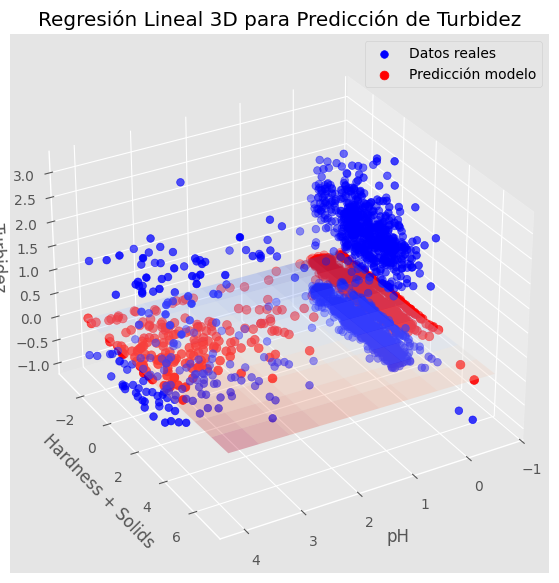

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Asegúrate de importar esto
import numpy as np

# Crear figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Forma recomendada

# Malla de valores para graficar el plano
xx, yy = np.meshgrid(
    np.linspace(df_agua["ph"].min(), df_agua["ph"].max(), num=10),
    np.linspace(suma.min(), suma.max(), num=10)
)

# Calcular los valores Z sobre la malla
nuevoX = regr2.coef_[0] * xx
nuevoY = regr2.coef_[1] * yy
z = nuevoX + nuevoY + regr2.intercept_

# Graficar el plano ajustado por regresión
ax.plot_surface(xx, yy, z, alpha=0.3, cmap='coolwarm')

# Puntos reales (Turbidez observada)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30, label='Datos reales')

# Puntos predichos (Turbidez predicha)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40, label='Predicción modelo')

# Ajuste de cámara y etiquetas
ax.view_init(elev=30., azim=60)
ax.set_xlabel('pH')
ax.set_ylabel('Hardness + Solids')
ax.set_zlabel('Turbidez')
ax.set_title('Regresión Lineal 3D para Predicción de Turbidez')
ax.legend()

plt.show()


Prediccion

In [ ]:
# Valor combinado de Hardness + Solids
valor_suma = 120 + 15000

# Hacer la predicción usando el modelo ya entrenado (regr2)
turbidez_predicha = regr2.predict([[6.8, valor_suma]])

# Mostrar resultado
print("Predicción de turbidez:", float(turbidez_predicha[0]))


Predicción de turbidez: 178.5038521097599


# Comparemos las predicciónes obtenidas en los modelos

Se comparan dos modelos: uno que predice la turbidez con dos variables y otro que estima la potabilidad con múltiples factores. La diferencia entre sus predicciones muestra cuál es más preciso según el objetivo del análisis.

Comparemos las predicciónes obtenidas en los modelos

In [ ]:
# Obtener las columnas correctas usadas durante el entrenamiento
columnas = X_train.columns.tolist()

# Valores de ejemplo para una muestra (ajusta según tu caso)
valores = [[6.8, 120, 15000, 400, 9.5, 300, 14.2, 66, 3.9]]

# Crear el DataFrame con los nombres de columna correctos
entrada_df = pd.DataFrame(valores, columns=columnas)

# Predicción continua con el modelo de regresión lineal
y_dato = modelo_lineal.predict(entrada_df)[0]
print("Predicción continua (potabilidad):", y_dato)

# Convertir a binaria: 1 si >= 0.5, sino 0
y_dato_bin = 1 if y_dato >= 0.5 else 0
print("Predicción binaria (0 = No potable, 1 = Potable):", y_dato_bin)



Predicción continua (potabilidad): 0.4055004288608934
Predicción binaria (0 = No potable, 1 = Potable): 0


# Evaluación del Modelo con Matriz de Confusión

Se visualiza cuántas predicciones fueron correctas o erróneas al clasificar la potabilidad del agua. La matriz ayuda a medir el rendimiento del modelo más allá del simple porcentaje de aciertos.

Diferencia entre predicciones: 178.098351680899


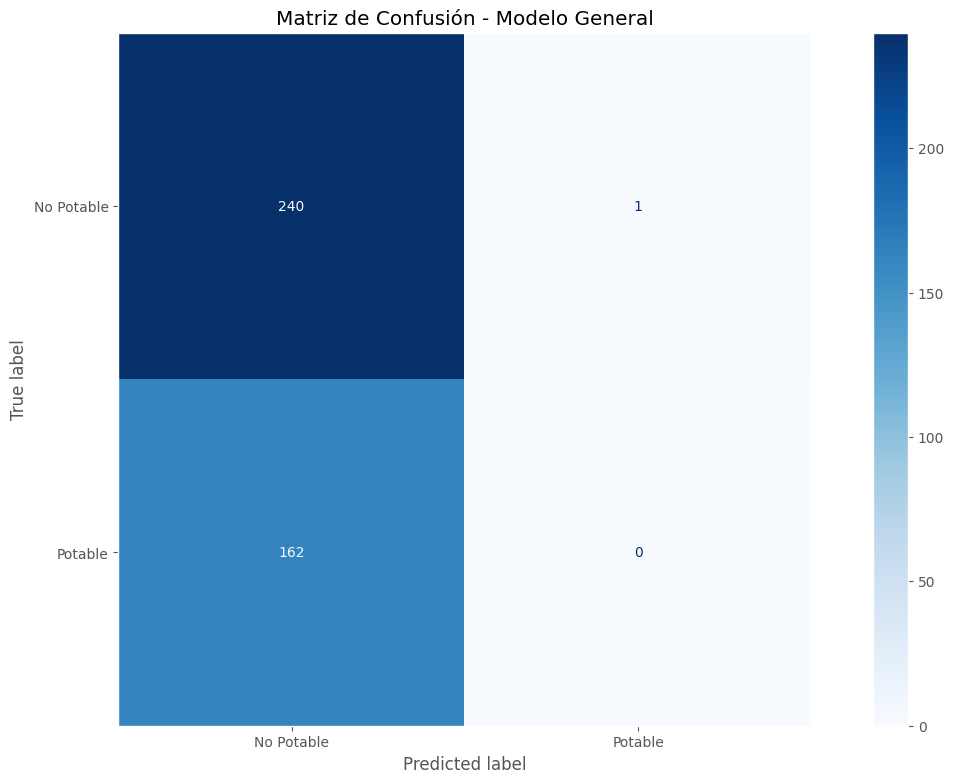

Precisión del modelo: 0.5955334987593052


In [ ]:
# --- Comparemos las predicciones obtenidas en los modelos ---
print("Diferencia entre predicciones:", z_dato - y_dato)

# --- Evaluación del modelo general con matriz de confusión ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

y_pred_cont = modelo_lineal.predict(X_test)
y_pred_bin = [1 if val >= 0.5 else 0 for val in y_pred_cont]

cm = confusion_matrix(y_test, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Potable', 'Potable'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Modelo General")
plt.grid(False)
plt.show()

print("Precisión del modelo:", accuracy_score(y_test, y_pred_bin))


# Notas finales

### El proyecto permitió analizar la potabilidad del agua aplicando técnicas de análisis de datos, regresión, clasificación y agrupamiento. Se identificaron variables clave como el pH y la turbidez para predecir la calidad del agua. Los modelos evaluados ofrecen una base para futuras mejoras en la toma de decisiones sobre agua potable.